# TP 4 - Machine Learning et Cybersécurité

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions


image_path = "./img/Grosser_Panda.JPG"
img = Image.open(image_path)

# Convertir l'image en tableau numpy
img_array = np.array(img)

# Dimensions de l'image
height, width, channels = img_array.shape

2023-12-30 21:18:00.002917: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-30 21:18:00.034162: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 21:18:00.034191: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 21:18:00.034880: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-30 21:18:00.039516: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-30 21:18:00.039909: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Exercice 1:

### Question 1

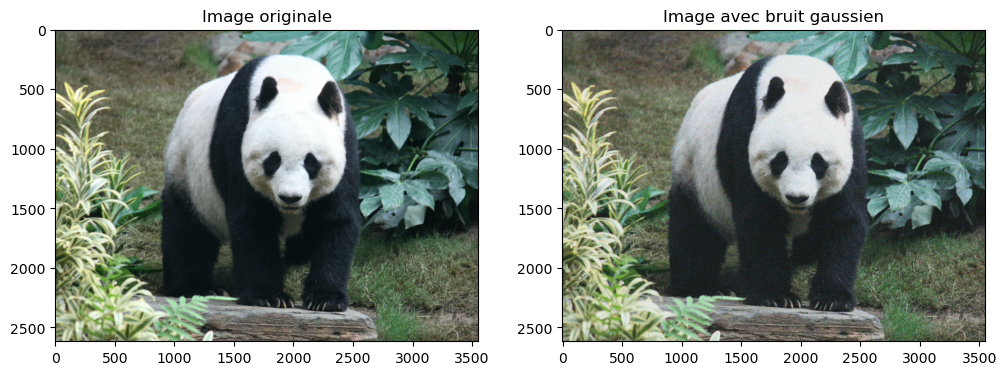

In [2]:
# Générer du bruit gaussien
mean = 0
std_dev = 50  # Choisir l'écart-type du bruit gaussien en fonction de l'effet désiré
gaussian_noise = np.random.normal(mean, std_dev, (height, width, channels))

# Ajouter le bruit à l'image
noisy_img_array = img_array + gaussian_noise

# Convertir les valeurs à l'échelle [0, 255]
noisy_img_array = np.clip(noisy_img_array, 0, 255).astype(np.uint8)

# Créer une nouvelle image à partir du tableau modifié
noisy_img = Image.fromarray(noisy_img_array)

# Sauvegarder l'image avec bruit gaussien
noisy_img.save("./img/image_avec_bruit_gaussien.jpg")

# Afficher l'image originale et l'image avec bruit
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Image originale")

plt.subplot(1, 2, 2)
plt.imshow(noisy_img)
plt.title("Image avec bruit gaussien")

plt.show()

### Question 2

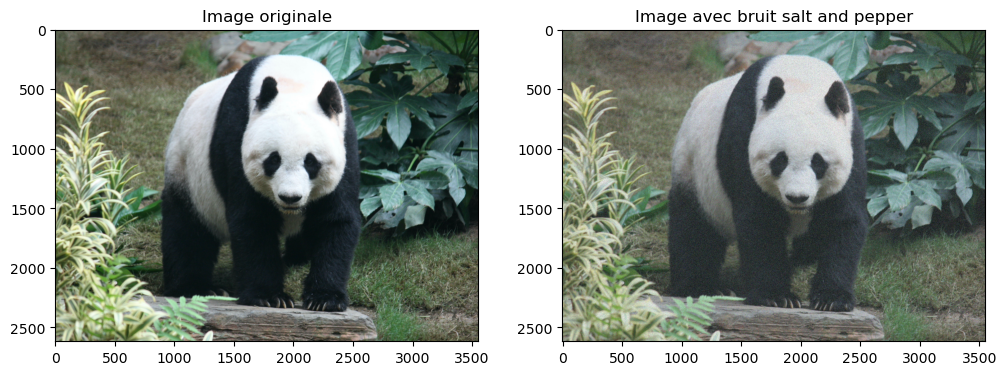

In [3]:
# Probabilité de bruit "salt and pepper" ajustée (moins de bruit)
salt_and_pepper_prob = 0.5

# Générer un masque de pixels à perturber
salt_and_pepper_mask = np.random.rand(height, width) < salt_and_pepper_prob

# Générer des valeurs de bruit pour les pixels perturbés
noise_values = np.random.randint(0, 256, (height, width, channels))

# Ajouter le bruit aux pixels perturbés
img_array[salt_and_pepper_mask] = (img_array[salt_and_pepper_mask] * 0.5) + (noise_values[salt_and_pepper_mask] * 0.5)

# Sauvegarder l'image avec bruit "salt and pepper"
noisy_img.save("./img/image_avec_bruit_salt_and_pepper.jpg")

# Afficher l'image originale et l'image avec bruit
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Image originale")

plt.subplot(1, 2, 2)
plt.imshow(img_array.astype(np.uint8))
plt.title("Image avec bruit salt and pepper")

plt.show()

### Question 3 

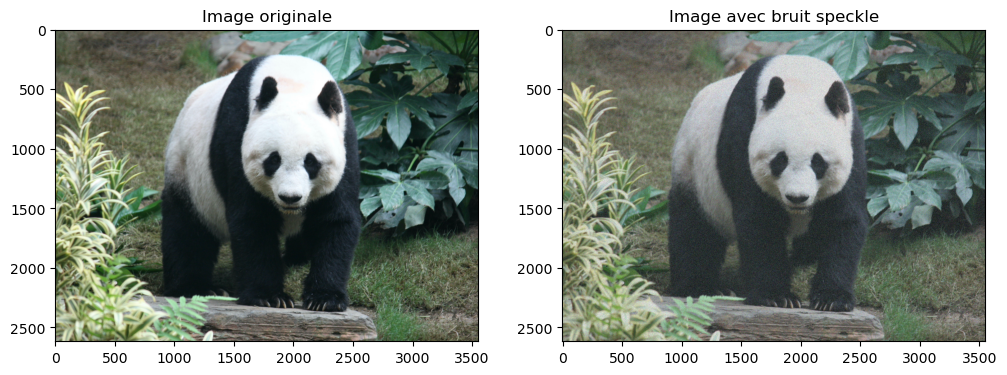

In [4]:
# Écart-type du bruit speckle (ajuste selon le niveau de bruit désiré)
speckle_std_dev = 0.1

# Générer du bruit speckle
speckle_noise = np.random.normal(1, speckle_std_dev, (height, width, channels))

# Ajouter le bruit speckle à l'image
speckled_img_array = img_array * speckle_noise

# Convertir les valeurs à l'échelle [0, 255]
speckled_img_array = np.clip(speckled_img_array, 0, 255).astype(np.uint8)

# Créer une nouvelle image à partir du tableau modifié
speckled_img = Image.fromarray(speckled_img_array)

# Sauvegarder l'image avec bruit speckle
speckled_img.save("./img/image_avec_bruit_speckle.jpg")

# Afficher l'image originale et l'image avec bruit speckle
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Image originale")

plt.subplot(1, 2, 2)
plt.imshow(speckled_img)
plt.title("Image avec bruit speckle")

plt.show()

### Question 4 

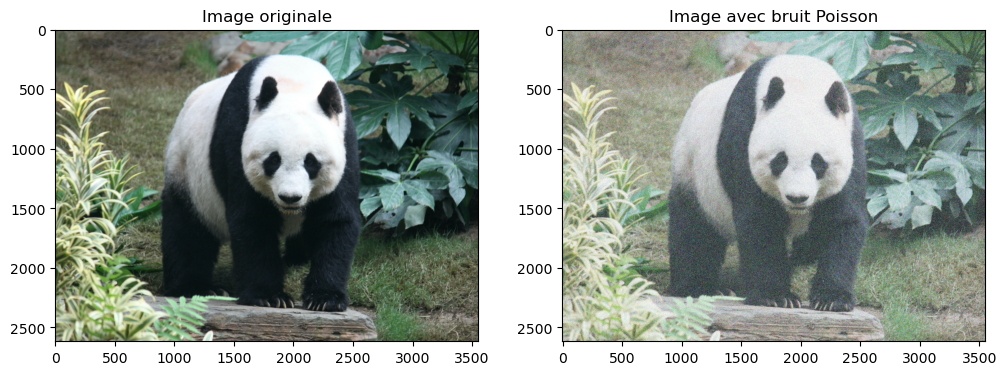

In [5]:
# Dimensions de l'image
height, width, channels = img_array.shape

# Générer du bruit Poisson
poisson_noise = np.random.poisson(img_array / 255.0) * 255.0

# Ajouter le bruit Poisson à l'image
poisson_img_array = img_array + poisson_noise

# Convertir les valeurs à l'échelle [0, 255]
poisson_img_array = np.clip(poisson_img_array, 0, 255).astype(np.uint8)

# Créer une nouvelle image à partir du tableau modifié
poisson_img = Image.fromarray(poisson_img_array)

# Sauvegarder l'image avec bruit Poisson
poisson_img.save("./img/image_avec_bruit_poisson.jpg")

# Afficher l'image originale et l'image avec bruit Poisson
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Image originale")

plt.subplot(1, 2, 2)
plt.imshow(poisson_img)
plt.title("Image avec bruit Poisson")

plt.show()

### Question 5 

1/1 [==============================] - 1s 537ms/step


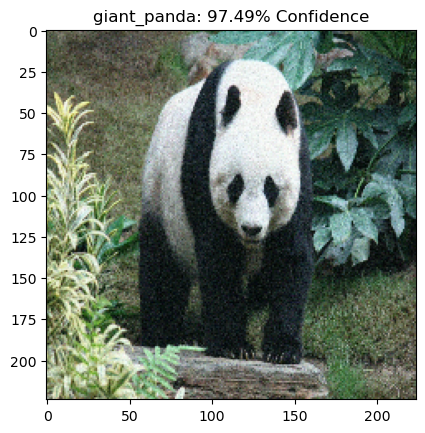

1/1 [==============================] - 0s 35ms/step


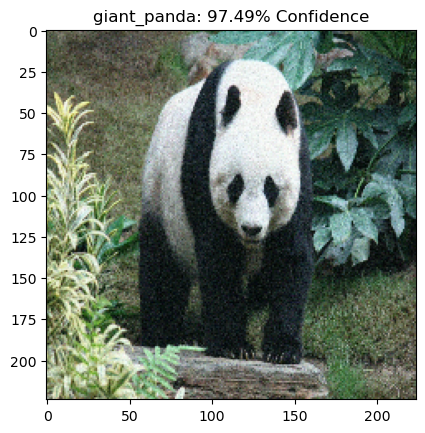

1/1 [==============================] - 0s 30ms/step


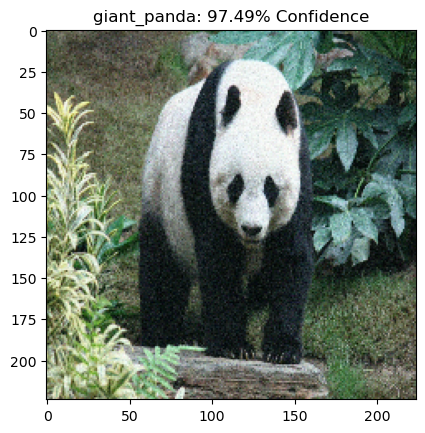

1/1 [==============================] - 0s 31ms/step


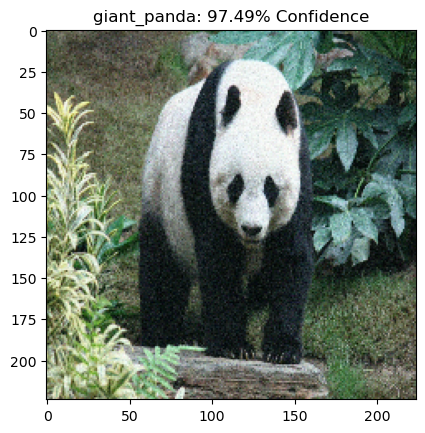

In [6]:
# Fonction de prétraitement spécifique à MobileNetV2
def preprocess(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    image = image[None, ...]
    return image

# Fonction pour obtenir l'étiquette ImageNet prédite
def get_imagenet_label(probs):
    return decode_predictions(probs, top=1)[0][0]

# Charger le modèle MobileNetV2 pré-entraîné sur ImageNet
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True, weights='imagenet')
pretrained_model.trainable = False

# Liste des noms de fichiers des images avec bruit
image_files = [
    "./img/image_avec_bruit_gaussien.jpg",
    "./img/image_avec_bruit_salt_and_pepper.jpg",
    "./img/image_avec_bruit_speckle.jpg",
    "./img/image_avec_bruit_poisson.jpg"
]

# Boucle pour tester chaque image
for image_file in image_files:
    # Charger l'image
    image_path = tf.keras.utils.get_file('demo.jpg', 'file:' + image_file)
    image_raw = tf.io.read_file(image_path)
    image = tf.image.decode_image(image_raw)
    image = preprocess(image)

    # Prédire la classe de l'image
    image_probs = pretrained_model.predict(image)

    # Afficher l'image avec la prédiction
    plt.figure()
    plt.imshow(image[0] * 0.5 + 0.5)
    _, image_class, class_confidence = get_imagenet_label(image_probs)
    plt.title('{}: {:.2f}% Confidence'.format(image_class, class_confidence * 100))
    plt.show()

## Exercice 2

1/1 [==============================] - 0s 36ms/step


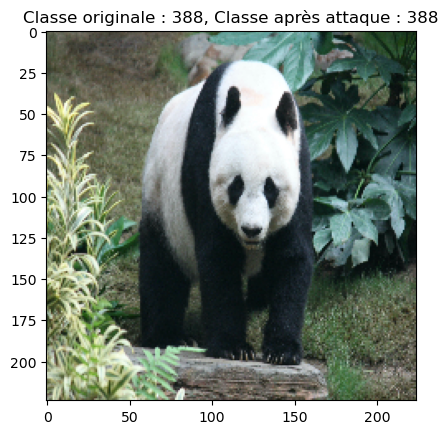

In [7]:
# Charger l'image du panda
image_path = "./img/Grosser_Panda.JPG"
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Charger le modèle MobileNetV2 pré-entraîné sur ImageNet
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True, weights='imagenet')
pretrained_model.trainable = False

# Fonction de prétraitement spécifique à MobileNetV2
def preprocess(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    image = image[None, ...]
    return image

# Fonction pour effectuer une attaque d'un pixel
def one_pixel_attack(image, label, model, num_pixels=1):
    image = preprocess(image)
    image_probs = model.predict(image)
    original_prediction = np.argmax(image_probs)

    pixels_to_change = np.random.choice(range(224 * 224 * 3), num_pixels, replace=False)
    
    # Copier le tensor pour le modifier
    image = tf.identity(image)

    for pixel in pixels_to_change:
        row = pixel // (224 * 3)
        col_channel = pixel % (224 * 3)
        col = col_channel // 3
        channel = col_channel % 3

        # Perturber le pixel
        image = tf.tensor_scatter_nd_update(image, indices=[[0, row, col, channel]], updates=[np.random.uniform(0, 1)])

    # Vérifier la prédiction après l'attaque
    image_probs_after_attack = model.predict(image)
    attack_prediction = np.argmax(image_probs_after_attack)

    return original_prediction, attack_prediction

# Effectuer une attaque d'un pixel
original_class, attack_class = one_pixel_attack(img_array, None, pretrained_model)

# Afficher les résultats
plt.figure()
plt.imshow(img)
plt.title(f"Classe originale : {original_class}, Classe après attaque : {attack_class}")
plt.show()